<a href="https://colab.research.google.com/github/Ximenaloranca/Ecuaciones-Diferenciales-Parciales-/blob/main/Ecuaci%C3%B3n_de_calor_con_LU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método implícito de Richardson**

Vamos a resolver la ecuacion de calor utilizando el metodo implicito en diferencias finitas

Siendo
$$\frac{\partial u}{\partial t} = \alpha^2 \frac{\partial^2 u}{\partial x^2}$$
con su condicion inicial
$$u(x, 0) = f(x) = \sin(\pi x)$$
y su condicion de frontera
$$u(0, t) = 0 \quad \text{y} \quad u(1, t) = 0$$
Usamos diferencias regresivas en el tiempo y diferencia central para el espacio, es decir
$$\frac{\partial u}{\partial t} \approx \frac{u_i^j - u_i^{j-1}}{k}
$$ y $$\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1}^j - 2u_i^j + u_{i-1}^j}{h^2}$$
Sustituyendo en la ecuacion de calor tenemos
$$\frac{u_i^j - u_i^{j-1}}{k} = \alpha^2 \left( \frac{u_{i+1}^j - 2u_i^j + u_{i-1}^j}{h^2} \right)$$
Haciendo  
 $$\lambda = \frac{\alpha^2 k}{h^2}$$

 Tenemos
 $$u_i^j - \lambda (u_{i+1}^j - 2u_i^j + u_{i-1}^j) = u_i^{j-1}$$
 Simplificando
 $$u_i^{j-1}= -\lambda u_{i-1}^j + (1 + 2\lambda)u_i^j - \lambda u_{i+1}^j$$

**Problema a resolver**  
Use el metodo de diferencias regresivas con
$$h=0.1, k=0.01$$
para aproximar la solucion de

$$\frac{\partial u}{\partial t} (x,t)- \frac{\partial^2 u}{\partial x^2} (x,t)=0$$
$$0<x<1 , 0<t $$
Sujeto a las restricciones

$u(0, t) = 0$, $u(1, t) = 0,$
$u(x, 0) = \sin(\pi x)$

In [ ]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
def f(x):
 return np.sin(np.pi*x)

In [ ]:
A = sp.Matrix([[3,-1,0,0,0,0,0,0,0],
               [-1,3,-1,0,0,0,0,0,0],
               [0,-1,3,-1,0,0,0,0,0],
               [0,0,-1,3,-1,0,0,0,0],
               [0,0,0,-1,3,-1,0,0,0],
               [0,0,0,0,-1,3,-1,0,0],
               [0,0,0,0,0,-1,3,-1,0],
               [0,0,0,0,0,0,-1,3,-1],
               [0,0,0,0,0,0,0,-1,3]])

In [ ]:
b = sp.Matrix([f(0.1),f(0.2),f(0.3),f(0.4),f(0.5),f(0.6),f(0.7),f(0.8),f(0.9)])

In [ ]:
A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [ ]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [ ]:
A.LUsolve(b)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

In [ ]:
def richardson_1(A, b, j):
  b_1 = b
  for i in range(j+1):
    sol = A.LUsolve(b_1)
    b_1 = sol
    _ = None
  return b_1

In [ ]:
richardson_1(A, b, 3)

Matrix([
[0.212692337894623],
[0.404564867841463],
[  0.5568357697548],
[0.654599706821597],
[0.688286863720354],
[0.654599706821597],
[  0.5568357697548],
[0.404564867841463],
[0.212692337894623]])

In [ ]:
def richardson (A, b, j):
  S = []
  b_1 = b.copy()

  for i in range(j+1):
    S.append(np.array(b_1, dtype=float).reshape(-1))
    sol = A.LUsolve(b_1)
    b_1 = sol
  return np.array(S)

In [ ]:
j = 20

In [ ]:
U = richardson(A, b, j)

In [ ]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.6, j+1)
X, Y = np.meshgrid(x, y)

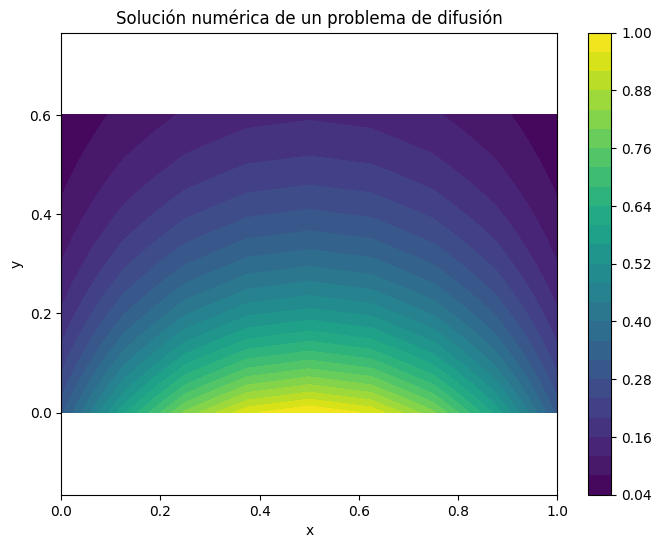

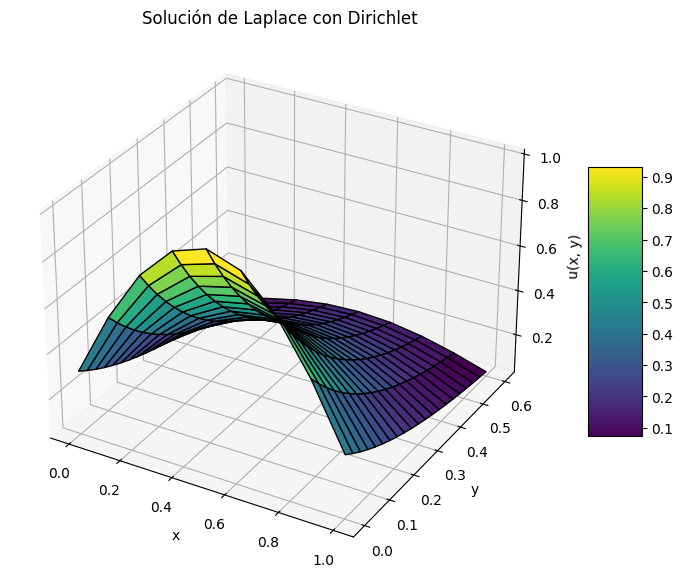

In [ ]:
# Mapa de colores

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de difusión')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de Laplace con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()